In [57]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [58]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [59]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [60]:
data = df_train.iloc[:, :-1].values
cov = np.cov(data, rowvar = False)

In [61]:
cov

array([[ 4.93665487e-03,  4.24551585e-04, -1.02247916e-03, ...,
         7.18410283e-04,  5.53862712e-04,  1.52487588e-02],
       [ 4.24551585e-04,  1.66549892e-03, -1.82059313e-04, ...,
         1.27823494e-05, -1.58369457e-04, -1.15170019e-03],
       [-1.02247916e-03, -1.82059313e-04,  3.20754453e-03, ...,
        -2.57574825e-04, -3.57948826e-04, -3.23975472e-04],
       ...,
       [ 7.18410283e-04,  1.27823494e-05, -2.57574825e-04, ...,
         8.84943711e-02,  4.93952357e-02, -2.62439903e-02],
       [ 5.53862712e-04, -1.58369457e-04, -3.57948826e-04, ...,
         4.93952357e-02,  7.79092165e-02, -2.47289212e-01],
       [ 1.52487588e-02, -1.15170019e-03, -3.23975472e-04, ...,
        -2.62439903e-02, -2.47289212e-01,  8.05531848e+01]])

In [62]:
np.linalg.det(cov)

0.0

In [63]:
pca = PCA(n_components = 100)
cov_pca = pca.fit(df_train.iloc[:, :-1].values)

In [64]:
data_train = cov_pca.transform(df_train.iloc[:, :-1].values)
data_test = cov_pca.transform(df_test.iloc[:, :-1].values)

In [65]:
df_train_red = pd.DataFrame(data_train)
df_train_red["Activity"] = df_train["Activity"]

In [66]:
df_train_red.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Activity
0,15.727224,-7.246259,-0.465589,-1.453681,1.419954,1.488152,-0.306350,0.457409,0.523195,-1.138726,...,-0.157028,-0.053790,-0.178523,0.033260,-0.121519,0.124503,-0.127123,0.102954,0.285576,STANDING
1,15.723317,-7.260690,-0.259002,-1.850986,0.753819,0.720199,0.685615,-0.655772,-0.919083,-0.449042,...,-0.102360,-0.006800,-0.123497,0.009937,-0.074680,0.084613,-0.039035,0.103179,0.021316,STANDING
2,15.742570,-7.204006,0.106483,-2.071934,0.621699,0.256556,-0.109675,-0.016776,-0.017898,0.053206,...,0.022522,0.137793,-0.132534,-0.027281,-0.236393,-0.037576,-0.132601,-0.024301,-0.037011,STANDING
3,15.715666,-7.403807,0.719931,-1.951593,0.233804,0.800208,1.036670,-0.280322,-0.804074,0.420023,...,0.542873,0.721372,0.855468,-0.327006,0.277605,0.021160,-0.099517,-0.127841,0.622596,STANDING
4,15.703153,-7.473707,0.987220,-2.076101,0.282271,0.511927,0.415493,-0.189274,-0.172830,0.382604,...,0.034992,-0.033523,-0.065215,-0.013547,-0.144103,-0.221955,-0.011256,0.108150,0.064498,STANDING


In [67]:
df_train_red_STAND = df_train_red[df_train_red["Activity"] == "STANDING"]
df_train_red_SIT = df_train_red[df_train_red["Activity"] == "SITTING"]
df_train_red_WALK = df_train_red[df_train_red["Activity"] == "WALKING"]
df_train_red_LAY = df_train_red[df_train_red["Activity"] == "LAYING"]
df_train_red_WALK_D = df_train_red[df_train_red["Activity"] == "WALKING_DOWNSTAIRS"]
df_train_red_WALK_U = df_train_red[df_train_red["Activity"] == "WALKING_UPSTAIRS"]

In [68]:
print(df_train_red_SIT.shape)

(1286, 101)


In [69]:
df_test.dropna(inplace = True)

In [70]:
df_test_red = pd.DataFrame(data_test)
df_test_red["Activity"] = df_test["Activity"]

In [71]:
df_test_red.shape

(2947, 101)

In [72]:
# Calculating true labels
labels_true = []
for i in range(len(df_test_red)):
    if (df_test_red['Activity'].iloc[i] == 'STANDING'):
        labels_true.append(0)
    if (df_test_red['Activity'].iloc[i] == 'SITTING'):
        labels_true.append(1)
    if (df_test_red['Activity'].iloc[i] == 'LAYING'):
        labels_true.append(2)
    if (df_test_red['Activity'].iloc[i] == 'WALKING'):
        labels_true.append(3)
    if (df_test_red['Activity'].iloc[i] == 'WALKING_UPSTAIRS'):
        labels_true.append(4)
    if (df_test_red['Activity'].iloc[i] == 'WALKING_DOWNSTAIRS'):
        labels_true.append(5)
labels_true = np.array(labels_true)
labels_true.shape

(2947,)

In [73]:
! pip install hmmlearn

You should consider upgrading via the 'c:\users\keshav anand\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [74]:
from hmmlearn import hmm

In [79]:
# Implementing hmm
# fitting hmm for each activity
def HMM_F1score(N, M, labels_true):
    hmm_stand = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_sit = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_lay = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_walk = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_walk_d = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_walk_u = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    
    hmm_stand.fit(df_train_red_STAND.iloc[:, 0:100].values)
    hmm_sit.fit(df_train_red_SIT.iloc[:, 0:100].values)
    hmm_lay.fit(df_train_red_LAY.iloc[:, 0:100].values)
    hmm_walk.fit(df_train_red_WALK.iloc[:, 0:100].values)
    hmm_walk_d.fit(df_train_red_WALK_D.iloc[:, 0:100].values)    
    hmm_walk_u.fit(df_train_red_WALK_U.iloc[:, 0:100].values)
    
    # calculating f1 score
    labels_predict = []
    for i in range(len(df_test_red)):
        log_likelihood_value = np.array([hmm_stand.score(df_test_red.iloc[i, 0:100].values.reshape((1,100))), hmm_sit.score(df_test_red.iloc[i, 0:100].values.reshape((1,100))), hmm_lay.score(df_test_red.iloc[i, 0:100].values.reshape((1,100))), hmm_walk.score(df_test_red.iloc[i, 0:100].values.reshape((1,100))), hmm_walk_d.score(df_test_red.iloc[i, 0:100].values.reshape((1,100))), hmm_walk_u.score(df_test_red.iloc[i, 0:100].values.reshape((1,100)))])
        labels_predict.append(np.argmax(log_likelihood_value))
    labels_predict = np.array(labels_predict)
    
    F1 = f1_score(labels_true, labels_predict, average = 'micro')
    acc = accuracy_score(labels_true, labels_predict)
    return F1,acc

In [80]:
states = np.arange(1, 36, 1)
states

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

HMM has been trained for num_states = 1
HMM has been trained for num_states = 2
HMM has been trained for num_states = 3
HMM has been trained for num_states = 4
HMM has been trained for num_states = 5
HMM has been trained for num_states = 6
HMM has been trained for num_states = 7
HMM has been trained for num_states = 8
HMM has been trained for num_states = 9
HMM has been trained for num_states = 10
HMM has been trained for num_states = 11
HMM has been trained for num_states = 12
HMM has been trained for num_states = 13
HMM has been trained for num_states = 14
HMM has been trained for num_states = 15
HMM has been trained for num_states = 16
HMM has been trained for num_states = 17
HMM has been trained for num_states = 18
HMM has been trained for num_states = 19
HMM has been trained for num_states = 20
HMM has been trained for num_states = 21
HMM has been trained for num_states = 22
HMM has been trained for num_states = 23
HMM has been trained for num_states = 24
HMM has been trained for 

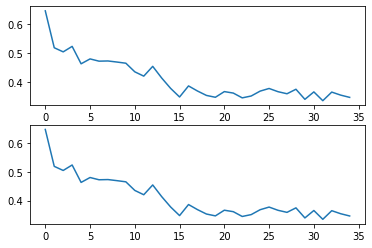

In [82]:
F1_value_states = []
acc_value_states = []
for i in states:
    print("HMM has been trained for num_states = {}".format(i))
    f1,acc = HMM_F1score(i, 1, labels_true)
    F1_value_states.append(f1)
    acc_value_states.append(acc)
fig, ax = plt.subplots(2,1)

ax[0].plot(F1_value_states)
ax[1].plot(acc_value_states)

plt.show()

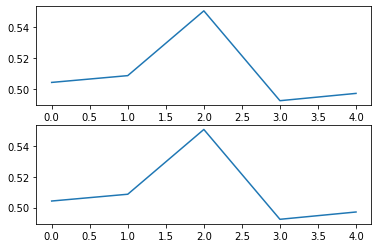

In [83]:
f_test = []
acc_test = []

for i in range(1, 6):
    f1, acc1 = HMM_F1score(3, i, labels_true)
    f_test.append(f1)
    acc_test.append(acc1)
    
fig, ax = plt.subplots(2,1)

ax[0].plot(f_test)
ax[1].plot(acc_test)

plt.show()

In [84]:
f1_val, acc_val = HMM_F1score(3, 8, labels_true)
print(f1_val)
print(acc_val)

0.4116050220563285
0.4116050220563285
